In [8]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


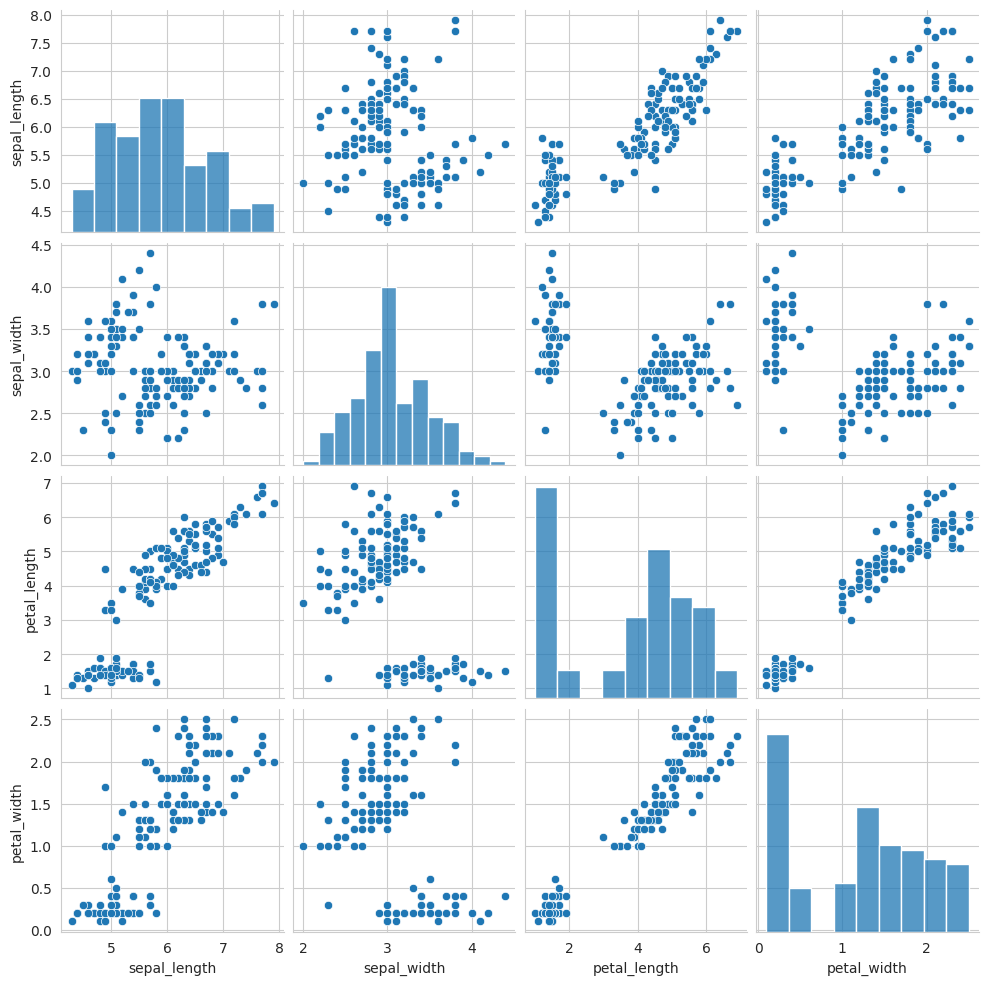

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris)

# A sempre valores que estao longe do amontoado provavelmente sendo uma especie distinta

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
wcss = []

for k in range(1,11):
    model = KMeans(n_clusters = k)
    model = model.fit(iris)
    wcss.append(model.inertia_)

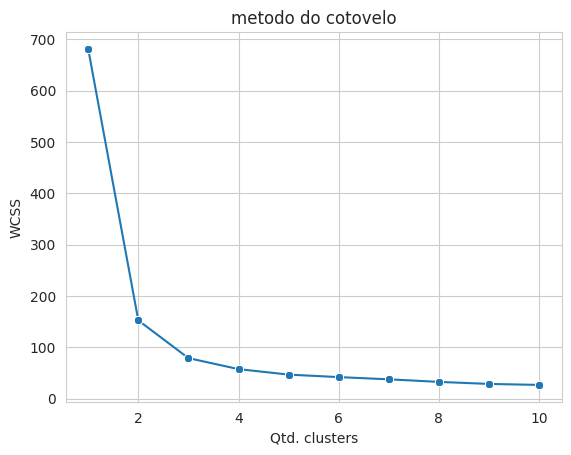

In [15]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x = range (1,11), y = wcss, marker = '8')
    grafico.set(title = 'metodo do cotovelo', ylabel = 'WCSS', xlabel = 'Qtd. clusters')  

In [17]:
model = KMeans(n_clusters =3)
model = model.fit(iris)

clusters = model.labels_
clusters_data = pd.concat([iris,pd.DataFrame(clusters,columns=['cluster'])], axis= 1)

In [18]:
clusters_data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


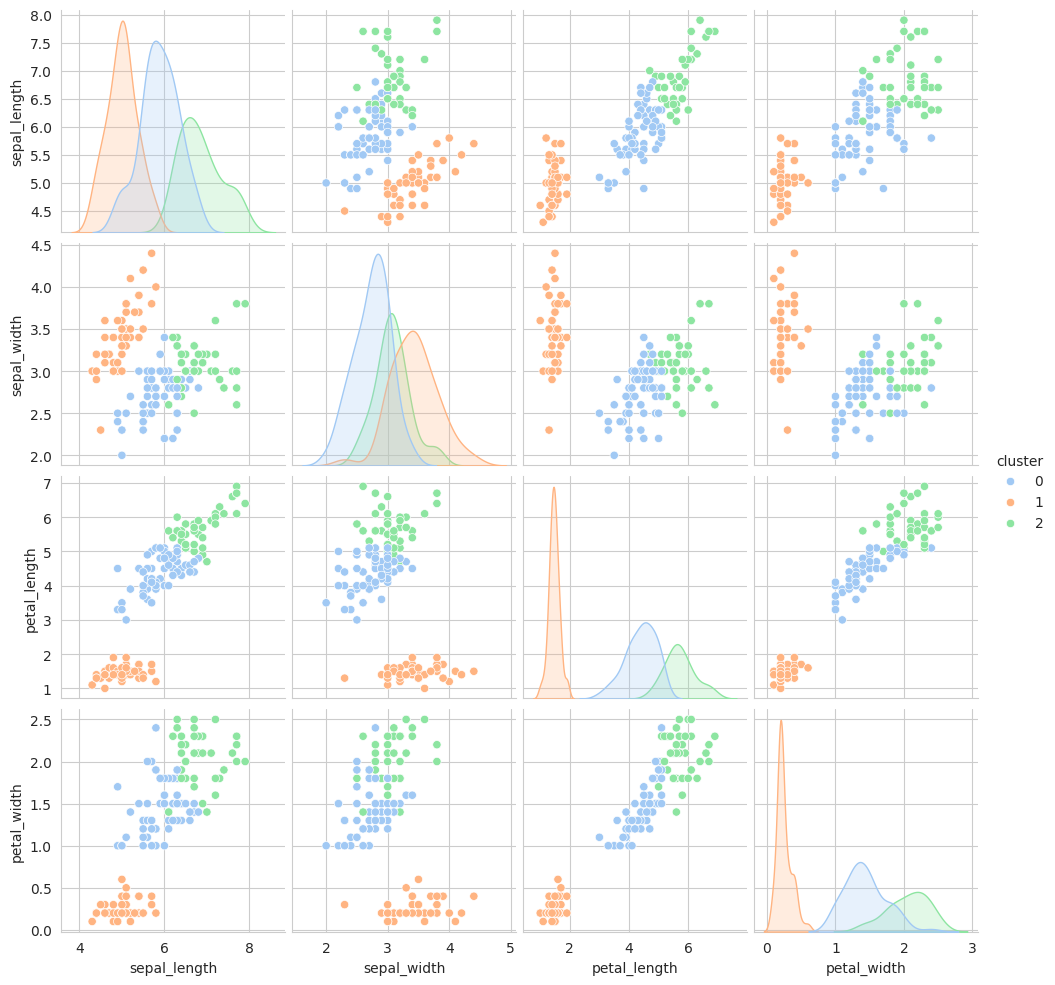

In [19]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clusters_data, hue = 'cluster', palette = 'pastel')

# A divisao de especies agora esta bem visivel em praticamente todos os graficos 

In [22]:
iris = np.array([5.1,3.5,1.4,0.2])
clusters = model.predict(iris.reshape(1,-1))
clusters

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)